In [ ]:
import os
import os.path as osp
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive        # Google Drive를 Colab에 연결해서 데이터 로딩하기
drive.mount('/content/drive')         # 드라이브 마운트

Mounted at /content/drive


In [ ]:
from keras.preprocessing.image import ImageDataGenerator   #keras로부터 ImageDataGenerator를 불러옵니다.
import numpy as np
import pandas as pd 
from keras.utils import to_categorical                     #데이터를 다루는데 필요한 라이브러리를 불러옵니다.
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
print(os.listdir('/content/drive/MyDrive/deep_learning/팀플/data/'))   #os.listdir() 메서드는 경로 내에 있는 파일의 
                                                                       #이름을 리스트의 형태로 반환합니다.

['sampleSubmission.csv', 'test1.zip', 'train.zip']


In [ ]:
import zipfile
#파일 압출 풀기
original_base_dir = '/content/datasets'
os.mkdir(original_base_dir)
dataset_zip = zipfile.ZipFile('/content/drive/MyDrive/deep_learning/팀플/data/test1.zip')
dataset_zip.extractall(original_base_dir)
dataset_zip.close()

dataset_zip = zipfile.ZipFile('/content/drive/MyDrive/deep_learning/팀플/data/train.zip')
dataset_zip.extractall(original_base_dir)
dataset_zip.close()

In [ ]:
import os
labels=['dogs', 'cats']
for label in labels:
    os.makedirs(os.path.join('train', label), exist_ok = True)


In [ ]:
!find /content/datasets/train -name 'dog.*' -exec mv {} train/dogs/ \; # 파일 이름을 기준으로 자료를 각각의 폴더에 이동시켜서 나눠줍니다.
!find /content/datasets/train -name 'cat.*' -exec mv {} train/cats/ \;

In [ ]:
# 사전 테스트롤 통해 찾아낸 불필요한 이미지 목록
bad_dog_ids = [5604, 6413, 8736, 8898, 9188, 9517, 10161, 
               10190, 10237, 10401, 10797, 11186]

bad_cat_ids = [2939, 3216, 4688, 4833, 5418, 6215, 7377, 
               8456, 8470, 11565, 12272]

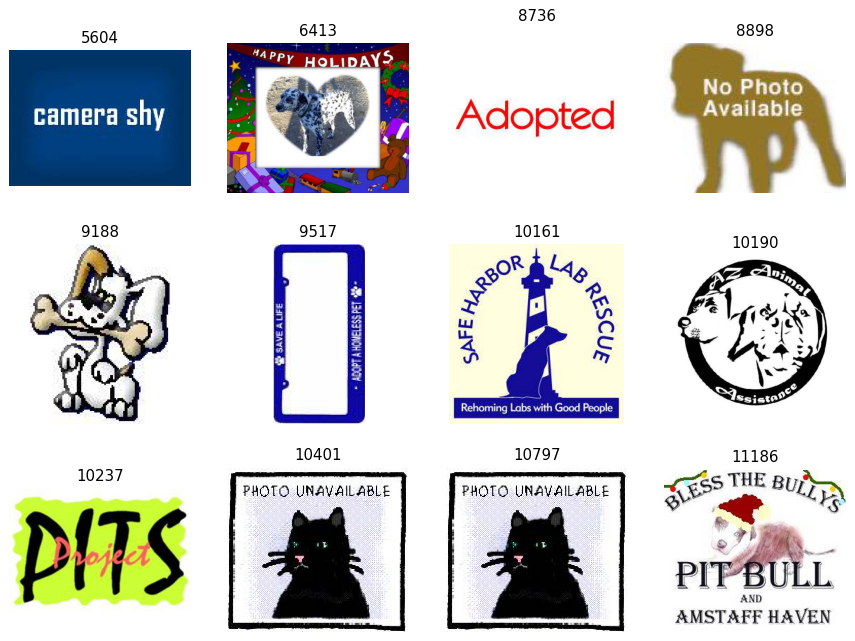

In [ ]:
import os
import matplotlib.image as mpimg
# 불필요한 이미지 확인 과정 
def load_images(ids, categ):
  images = []
  dirname = categ+'s' # dog -> dogs
  for theid in ids: 
    fname = 'train/{dirname}/{categ}.{theid}.jpg'.format(
        dirname=dirname,
        categ=categ, 
        theid=theid
    )
    im = mpimg.imread(fname)
    images.append(im)
  return images
bad_dogs = load_images(bad_dog_ids, 'dog')
bad_cats = load_images(bad_cat_ids, 'cat')
def plot_images(images, ids):
    ncols, nrows = 4, 3
    fig = plt.figure( figsize=(ncols*3, nrows*3), dpi=90)
    for i, (mpimg, theid) in enumerate(zip(images,ids)):
      plt.subplot(nrows, ncols, i+1)
      plt.imshow(mpimg)
      plt.title(str(theid))
      plt.axis('off')
plot_images(bad_dogs, bad_dog_ids) 
# 강아지 파일중 불필요한 데이터 12개, 고양이 파일중 불필요한 데이터 11개를 찾아냈습니다.

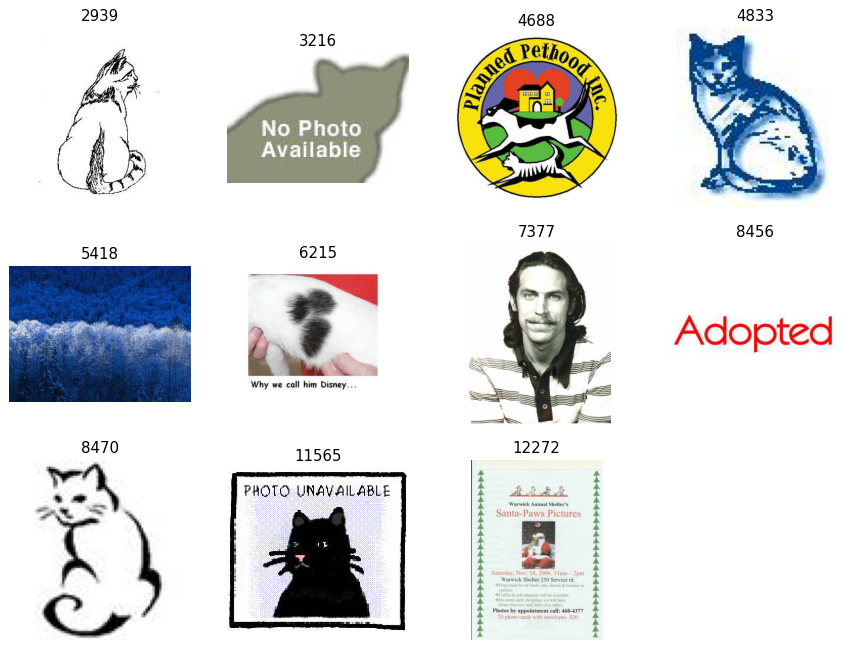

In [ ]:
plot_images(bad_cats, bad_cat_ids)

In [ ]:
# 데이터 목록에서 불필요한 이미지를 골라 삭제합니다.
subsets=['cats', 'dogs'] 
for subset in subsets:
    category = subset[:-1]
    if category == 'cat':
        ids = bad_cat_ids
    else:
        ids = bad_dog_ids
    
    for id in ids:
        fname = category +'.'+ str(id) + '.jpg'
        dirty_img = os.path.join('train',subset,fname)
        print(dirty_img)
        os.remove(dirty_img)
        print("clean up data")

train/cats/cat.2939.jpg
clean up data
train/cats/cat.3216.jpg
clean up data
train/cats/cat.4688.jpg
clean up data
train/cats/cat.4833.jpg
clean up data
train/cats/cat.5418.jpg
clean up data
train/cats/cat.6215.jpg
clean up data
train/cats/cat.7377.jpg
clean up data
train/cats/cat.8456.jpg
clean up data
train/cats/cat.8470.jpg
clean up data
train/cats/cat.11565.jpg
clean up data
train/cats/cat.12272.jpg
clean up data
train/dogs/dog.5604.jpg
clean up data
train/dogs/dog.6413.jpg
clean up data
train/dogs/dog.8736.jpg
clean up data
train/dogs/dog.8898.jpg
clean up data
train/dogs/dog.9188.jpg
clean up data
train/dogs/dog.9517.jpg
clean up data
train/dogs/dog.10161.jpg
clean up data
train/dogs/dog.10190.jpg
clean up data
train/dogs/dog.10237.jpg
clean up data
train/dogs/dog.10401.jpg
clean up data
train/dogs/dog.10797.jpg
clean up data
train/dogs/dog.11186.jpg
clean up data


In [ ]:
# 남은 이미지들을 기존의 train 데이터 셋 폴더로 모아줍니다.
!find train/dogs/ -name 'dog.*' -exec mv {} /content/datasets/train \;
!find train/cats/ -name 'cat.*' -exec mv {} /content/datasets/train \;

In [ ]:
# 데이터 형상 관련 상수를 정의합니다.
FAST_RUN = False
IMAGE_WIDTH=150
IMAGE_HEIGHT=150
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [ ]:
filenames = os.listdir("/content/datasets/train")      #os.listdir() 메서드로 경로 내에 있는 파일의 이름을 리스트의 형태로 반환합니다.
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':                           #dog는 1, cat은 0으로 분류합니다.
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [ ]:
df.head() # 데이터를 앞에서부터 5개 불러와 잘 분류되여있는지 확인합니다.

,filename,category
0,cat.9402.jpg,0
1,cat.2156.jpg,0
2,dog.3070.jpg,1
3,cat.286.jpg,0
4,dog.10072.jpg,1


In [ ]:
df.tail() # 데이터를 뒤에서부터 5개 불러와 잘 분류되여있는지 확인합니다.

,filename,category
24972,dog.5655.jpg,1
24973,dog.4988.jpg,1
24974,cat.2249.jpg,0
24975,dog.5645.jpg,1
24976,cat.6054.jpg,0


In [ ]:
print(df['category'].value_counts()) #카테고리 분류한 데이터의 갯수를 확인합니다.

0    12489
1    12488
Name: category, dtype: int64


In [ ]:
from keras.backend import dropout
from keras.layers.normalization.batch_normalization_v1 import BatchNormalization
from keras import layers, models
#컨볼류션 2d와 maxpooling을 번갈아 사용합니다.
#중간에 BatchNormalization을 통해 학습하는 과정 자체를 전체적으로 안정화하여 학습 속도를 가속 시켜줍니다.
#dropout을 통해 오버피팅을 방지합니다.
#Flatten을 통해 3차원을 1차원 배열로 바꿔줍니다.
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMAGE_WIDTH,IMAGE_HEIGHT,IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 148, 148, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 72, 72, 64)       2

In [ ]:
from tensorflow.keras import optimizers
#RMSprop은 옵티마이져의 한 종류로 일반적으로 순환 신경망(RNN)에 많이 사용됩니다.
#categorical_crossentropy는 label이 원-핫 인코딩 된 형태 즉 label이 class를 나타내는 one-hot vector를 값으로 가질 때 사용됩니다.
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
earlystop = EarlyStopping(patience=10) #학습하는 동안 loss값이 줄어들지 않으면 stop시켜주도록 설정합니다.

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)
#monitor은 ReduceLROnPlateau의 기준이 되는 값으로 'val_loss'를 사용해 val_loss가 더이상 감소되지 않을 경우 ReduceLROnPlateau을 적용합니다.
#patience은 Training이 진행됨에도 더이상 monitor되는 값의 개선이 없을 경우, 최적의 monitor 값을 기준으로 몇 번의 epoch을 진행하고, learning rate를 조절할 지의 값
#verbose가 1일 경우 EarlyStopping이 적용될 때, 화면에 적용되었다고 나타납니다.
#factor은 Learning rate를 얼마나 감소시킬 지 정하는 인자값으로 현재 lr이 0.001이고 factor가 0.5이므로, 콜백함수가 실행된다면 그 다음 lr은 0.0005가 됩니다.
#min_lr은 Learning rate의 하한선을 지정합니다.

In [ ]:
callbacks = [earlystop, learning_rate_reduction]

In [ ]:
df["category"] = df["category"].replace({0: 'cat', 1: 'dog'})

In [ ]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)
#train,validate 정의해줍니다.
#전체 data중 20%를 validate_df 넣어줍니다.
#random_state는 호출 할때마다 동일한 학습/테스트용 데이터 세트를 생성해주기 위한 난수입니다.

cat    10012
dog     9969
Name: category, dtype: int64


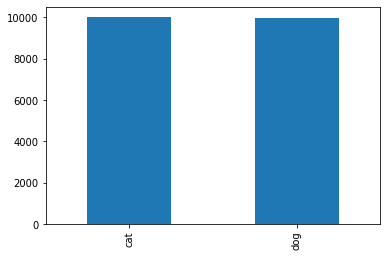

In [ ]:
train_df['category'].value_counts().plot.bar()
print(train_df['category'].value_counts())
#확인

cat    10012
dog     9969
Name: category, dtype: int64


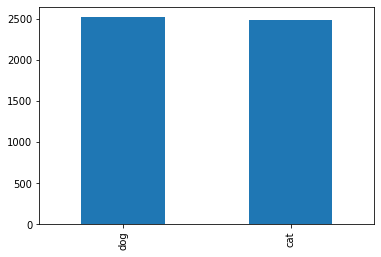

In [ ]:
validate_df['category'].value_counts().plot.bar()
print(validate_df['category'].value_counts())

In [ ]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15
#batch_size를 15로 지정해 15개씩 샘플로 가중치를 계산합니다.
#배치사이즈가 클수록 많은 데이터를 저장해두어야 하므로 용량이 커야합니다. 
#반면, 배치사이즈가 작으면 학습은 촘촘하게 되겠지만 계속 레이블과 비교하고, 가중치를 업데이트하는 과정을 거치면서 시간이 오래 걸립니다.

In [ ]:
#학습 데이터 뻥튀기 하기 
train_datagen = ImageDataGenerator(
    rotation_range=15,      #rotation_range는 랜덤하게 사진을 회전시킬 각도 범위
    rescale=1./255,         #이미지를 1/255로 스케일을 조정 
    shear_range=0.1,        #shear_range는 랜덤하게 전단 변환을 적용할 각도 범위 
    zoom_range=0.2,         #zoom_range는 랜덤하게 사진을 확대할 범위
    horizontal_flip=True,   #horizontal_flip은 랜덤하게 이미지를 수평으로 뒤집는다./수평 대칭을 가정할 수 있을 때 사용
    width_shift_range=0.1,  #width_shift_range와 
    height_shift_range=0.1  #height_shift_range는 사진을 수평과 수직으로 랜덤하게 평행 이동시킬 범위
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "/content/datasets/train", 
    x_col='filename',                   # filename를 열이름
    y_col='category',                   # category를 열이름
    target_size=IMAGE_SIZE,             #이미지 사이즈
    class_mode='categorical',           #y값 변화방법
    batch_size=batch_size               #배치사이즈
)

Found 19981 validated image filenames belonging to 2 classes.


In [ ]:
validation_datagen = ImageDataGenerator(rescale=1./255)         #이미지를 1/255로 스케일을 조정
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "/content/datasets/train", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)
#validation이미지도 마찬가지로 작업을 해줍니다.
#4996개의 validation이미지가 2classes로 됨

Found 4996 validated image filenames belonging to 2 classes.


In [ ]:
#위에 데이터 부풀리기가 잘 되었는지 확인합니다.
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df,
    "/content/datasets/train",
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


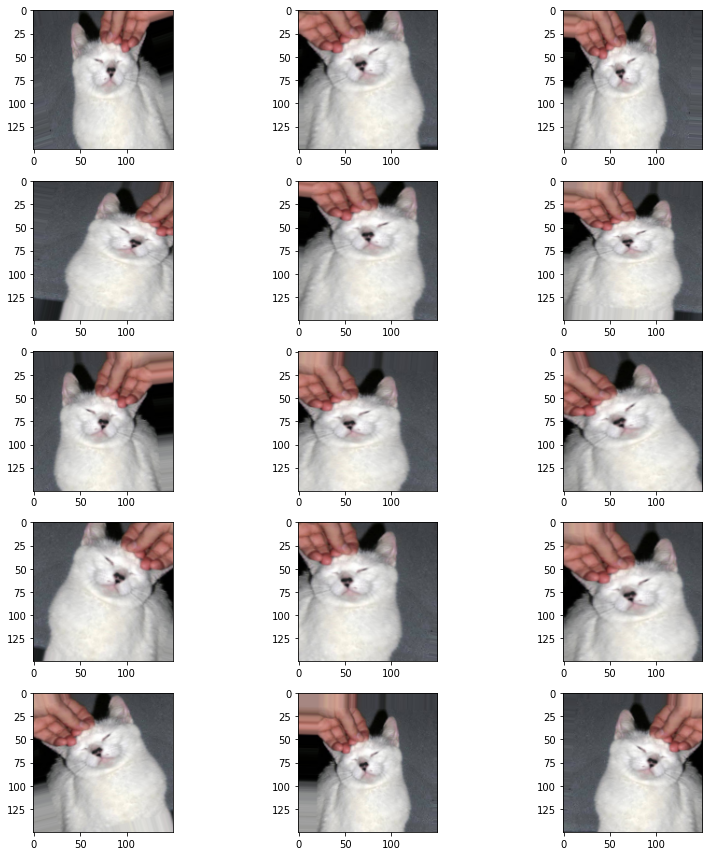

In [ ]:
#작업된 데이터 확인
plt.figure(figsize=(12, 12))
for i in range(0, 15):
  plt.subplot(5, 3, i+1)
  for X_batch, Y_batch in example_generator:
      image = X_batch[0]
      plt.imshow(image)
      break
plt.tight_layout()
plt.show()
 

In [ ]:
#학습시작
#46번째 에포크에서 콜백 됩니다.
epochs = 3 if FAST_RUN else 50
history = model.fit_generator(
    train_generator,
    epochs = epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

<ipython-input-32-e486b7ebbb1e>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/50
1332/1332 [==============================] - 183s 130ms/step - loss: 0.7505 - accuracy: 0.6310 - val_loss: 1.4051 - val_accuracy: 0.5666 - lr: 0.0010
Epoch 2/50
1332/1332 [==============================] - 170s 128ms/step - loss: 0.5550 - accuracy: 0.7190 - val_loss: 0.4685 - val_accuracy: 0.7758 - lr: 0.0010
Epoch 3/50
1332/1332 [==============================] - 170s 127ms/step - loss: 0.4957 - accuracy: 0.7617 - val_loss: 0.5675 - val_accuracy: 0.6867 - lr: 0.0010
Epoch 4/50
1332/1332 [==============================] - 166s 125ms/step - loss: 0.4622 - accuracy: 0.7855 - val_loss: 0.3932 - val_accuracy: 0.8146 - lr: 0.0010
Epoch 5/50
1332/1332 [==============================] - 176s 132ms/step - loss: 0.4270 - accuracy: 0.8087 - val_loss: 0.7482 - val_accuracy: 0.6753 - lr: 0.0010
Epoch 6/50
1332/1332 [==============================] - ETA: 0s - loss: 0.4127 - accuracy: 0.8140
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
1332/1332 [==========

In [ ]:
model.save_weights("A2model.h5")
#모델 저장

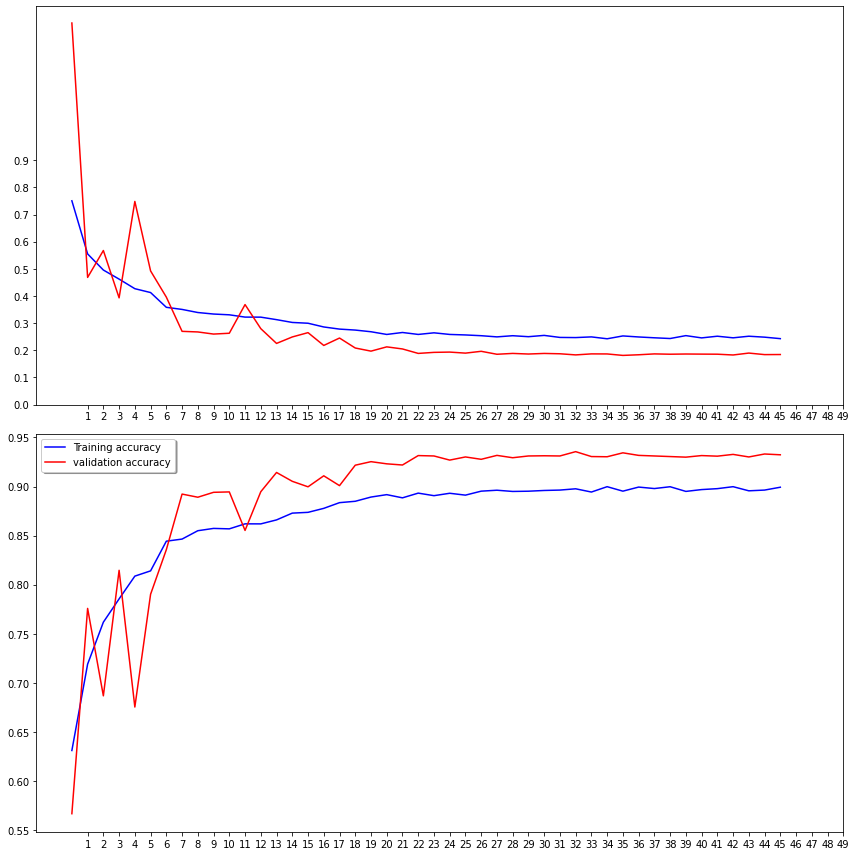

In [ ]:
#그래프 확인 
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r', label="validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [ ]:
#결과확인
history_dict = history.history
print("final train accuracy : {:.4f}".format(history_dict['accuracy'][-1]))
print("final val accuracy : {:.4f}".format(history_dict['val_accuracy'][-1]))

final train accuracy : 0.8993
final val accuracy : 0.9323


In [ ]:
#test데이터 불러오기
test_filenames = os.listdir("/content/datasets/test1/")
test_df=pd.DataFrame({
    'filename': test_filenames
})

nb_samples = test_df.shape[0]

In [ ]:
#test데이터 사이즈 맞추기
test_gen=ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df,
    "/content/datasets/test1/",
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

Found 12500 validated image filenames.


In [ ]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))
#아까 학습된 모델에 테스트 데이터 넣어보기

<ipython-input-38-52619fd72ccc>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))


In [ ]:
test_df['category']=np.argmax(predict, axis=-1)
#예측 결과가 고양이10% 강아지90% 이런식으로 나오기 때문에 개와 고양이일 확률중 보다 큰값에 해당하는 레이블을 선택해서 값을 치환합니다.

In [ ]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

In [ ]:
test_df['category']=test_df['category'].replace({'dog':1, 'cat':0})

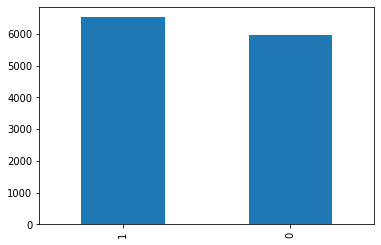

In [ ]:
test_df['category'].value_counts().plot.bar()
#개와 고양이를 어느정도 비율로 예측했는지 확인합니다.

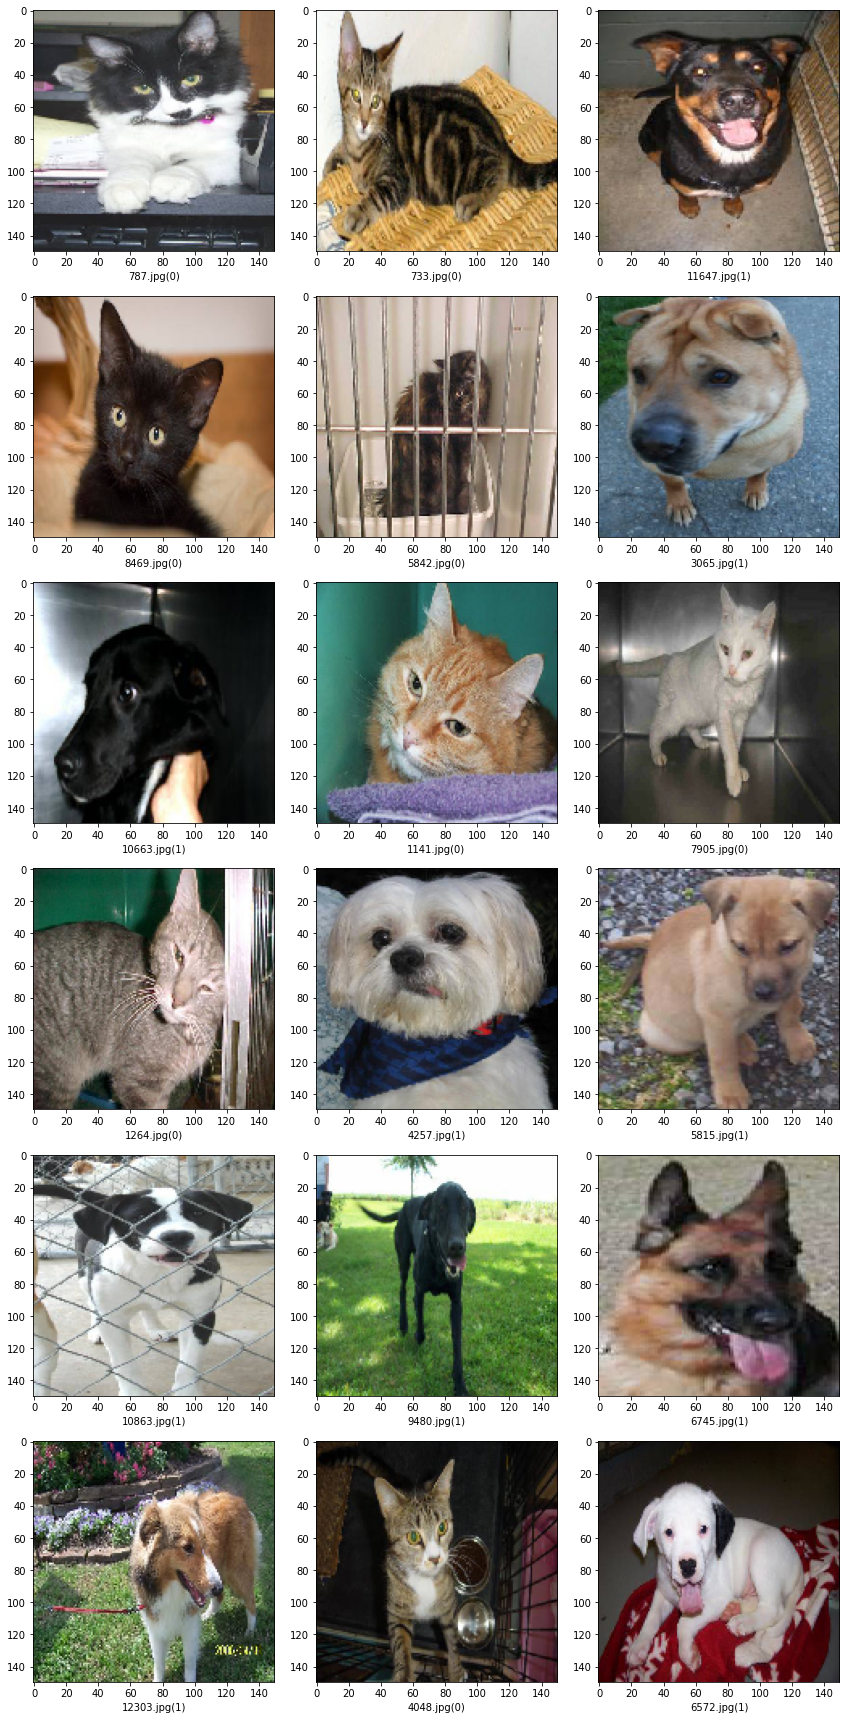

In [ ]:
#예측한 결과를 눈으로 확인
import keras.utils as image

sample_test=test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
  filename=row['filename']
  category=row['category']
  img=image.load_img("/content/datasets/test1/"+filename, target_size=IMAGE_SIZE)
  plt.subplot(6, 3, index+1)
  plt.imshow(img)
  plt.xlabel(filename+'('+"{}".format(category)+')')
plt.tight_layout()
plt.show()


In [ ]:
predict # 예측한 내용이 어떻게 저장되었는지 리스트를 확인합니다.

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [ ]:
train_generator.class_indices # 예측 값에서 cat과 dog가 각각 0, 1로 분류되었음을 확인합니다.

{'cat': 0, 'dog': 1}

In [ ]:
# submission 파일을 생성하기 위해 id와 label을 지정해줍니다.
submission_df = test_df.copy()
submission_df['id'] = submission_df['filename'].str.split('.').str[0]
submission_df['label'] = submission_df['category']
submission_df.drop(['filename', 'category'], axis=1, inplace=True)

In [ ]:
# 구성된 내용을 확인합니다.
submission_df

,id,label
0,787,0
1,733,0
2,11647,1
3,8469,0
4,5842,0
...,...,...
12495,7238,1
12496,10891,0
12497,6915,0
12498,9906,0


In [ ]:
# 위의 내용대로 나타난 최종 결과물을 csv 확장자의 submission 파일로 생성합니다.
submission_df.to_csv('submission_A2_team6.csv', index=False)